# Problem Statement
## To identify correct or incorrect position of catheters ans lines insertion in X-ray for physicians

#### Importing important libraries

In [2]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import albumentations as A

import warnings
warnings.filterwarnings("ignore")

### Selecting random images (10 images)

In [3]:
import os
import shutil
import glob
import random
path = r"x-ray images/"
random_images = random.sample(glob.glob(path + "*.jpg"),10)

for idx,img in enumerate(random_images):
    print("Image :-",idx,"\n", cv2.imread(img))
    print("---------------------------------")

Image :- 0 
 [[[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[31 31 31]
  [34 34 34]
  [42 42 42]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[21 21 21]
  [24 24 24]
  [32 32 32]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[13 13 13]
  [16 16 16]
  [24 24 24]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
---------------------------------
Image :- 1 
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[1 1 1]
  [2 2 2]
  [3 3 3]
  ...
  [2 2 2]
  [3 3 3]
  [3 3 3]]

 [[0 0 0]
  [1 1 1]
  [2 2 2]
  ...
  [1 1 1]
  [2 2 2]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]]
----

### Applying image processing Techniques

In [6]:
image_processing_list = [alb.RandomSunFlare(p=1), 
                      alb.RandomFog(p=1), 
                      alb.RandomBrightness(p=1),
                      alb.RandomCrop(p=1,height = 512, width = 512), 
                      alb.Rotate(p=1, limit=90),
                      alb.RGBShift(p=1), 
                      alb.RandomSnow(p=1),
                      alb.HorizontalFlip(p=1), 
                      alb.VerticalFlip(p=1), 
                      alb.RandomContrast(limit = 0.5,p = 1),
                      alb.HueSaturationValue(p=1,hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=50),
                      alb.Cutout(p=1),
                      alb.Transpose(p=1), 
                      alb.ImageCompression(p=1),
                      alb.CoarseDropout(p=1)]

#### Apply filters on 1 image

In [4]:
selected_images = cv2.imread(random_images[3])
augmented_images = []
for augmentation in augmentations_list:
    img = augmentation(image=selected_images)['image']
    augmented_images.append(img)

augmented_images.insert(0, selected_images)

In [5]:
titles_list = ["Original","RandomSunFlare","RandomFog","RandomBrightness",
               "RandomCrop","Rotate", "RGBShift", "RandomSnow","HorizontalFlip", "VerticalFlip", "RandomContrast","HSV",
               "Cutout","Transpose","JpegCompression","CoarseDropout",]

#### Defining function to plot multiple processed images

In [6]:
def plot_images(images, titles, ncols, nrows=4, main_title=""):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=nrows, ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize=30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(images, titles)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
    plt.show()

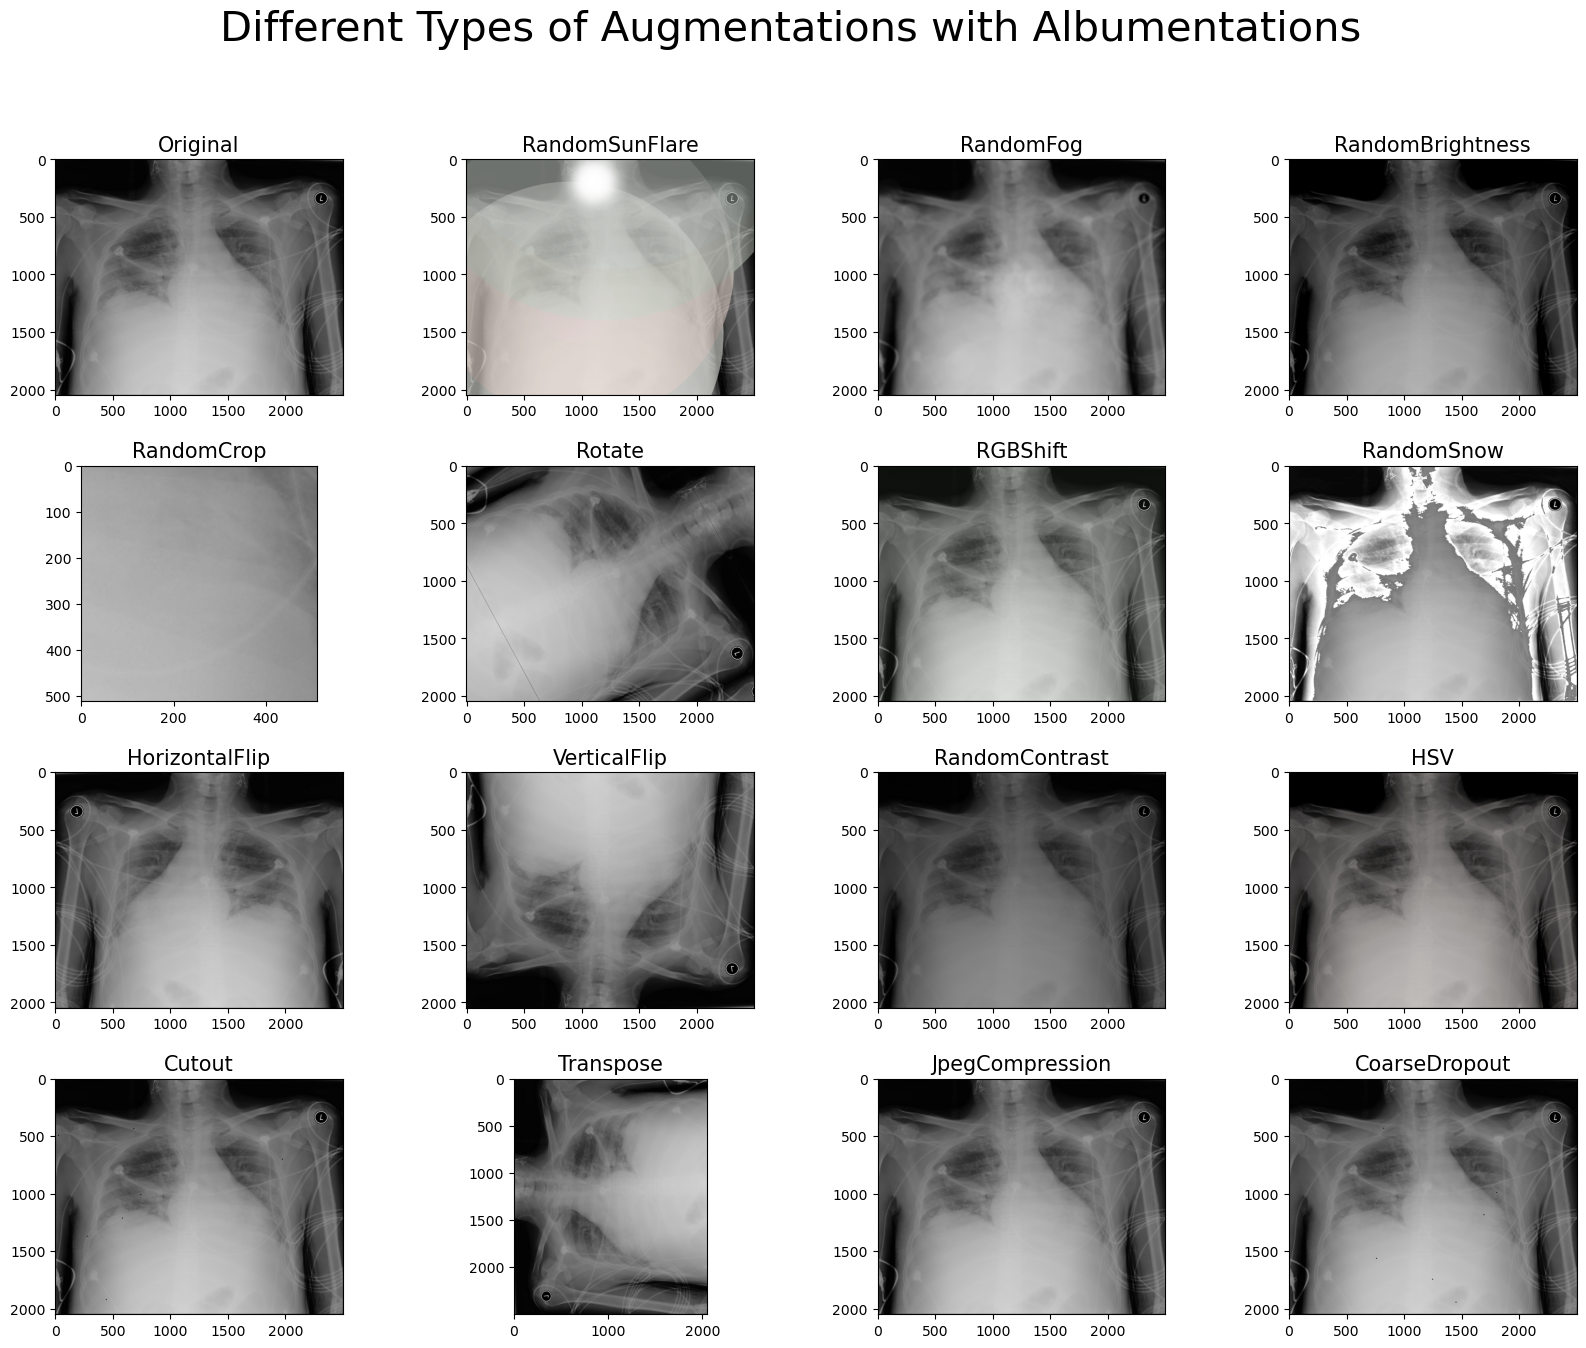

In [9]:
plot_images(augmented_images, titles_list, ncols=4, main_title="Images After applying different augmentations")

### Performing masking

In [16]:
def get_data(X_shape):
    im_array = []
    mask_array = []
    for i in random_images: 
        im = cv2.resize(cv2.imread(i), (X_shape, X_shape))[:,:,0]
        mask = cv2.resize(cv2.imread(i), (X_shape, X_shape))[:,:,0]
        im_array.append(im)
        mask_array.append(mask)
        
    return im_array, mask_array

### Plot images after masking

In [17]:
def plot_images_with_masks(X, y):
    samples = []
    for i in range(6):
        left = X[i]
        right = y[i]
        combined = np.hstack((left, right))
        samples.append(combined)
        
    for i in range(0, 6, 3):
        plt.figure(figsize=(25,10))
        
        plt.subplot(2,3,1+i)
        plt.imshow(samples[i])
        
        plt.subplot(2,3,2+i)
        plt

In [18]:
dimensions = 256*2
X_train,y_train = get_data(dimensions)

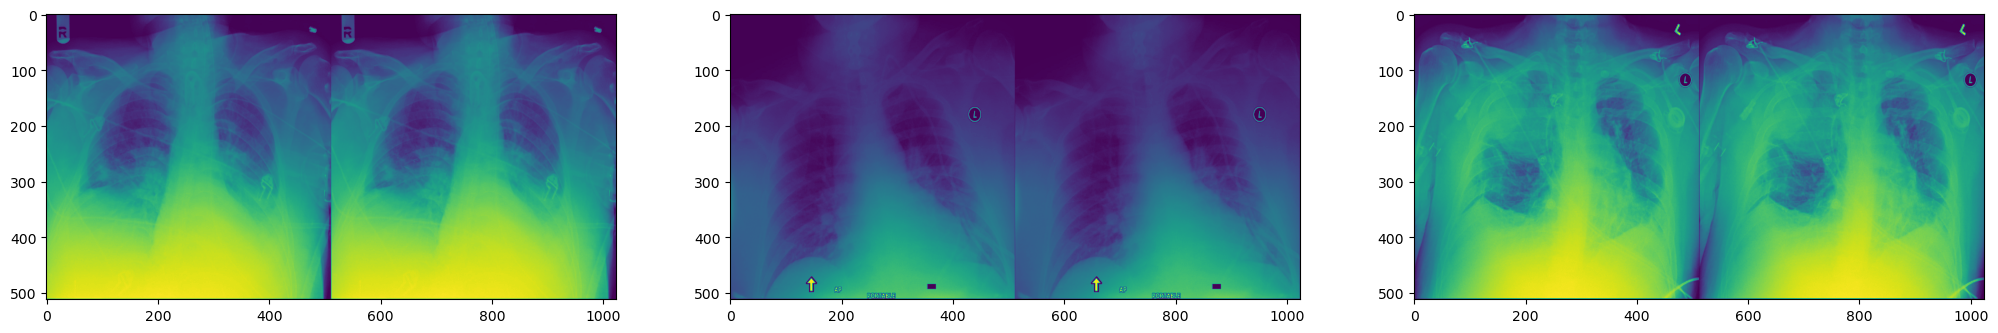

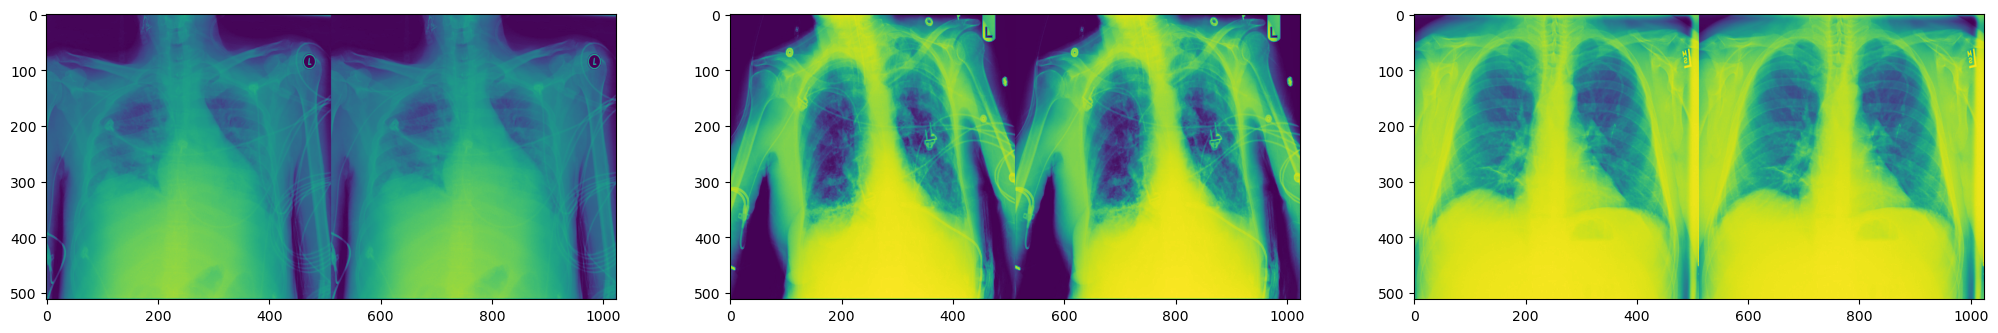

In [19]:
plot_images_with_masks(X_train,y_train)

#### Gaussian filter will prefer for the detect and visualization of catheters and lines in X-ray images use to `blur' images and remove detail and noise.

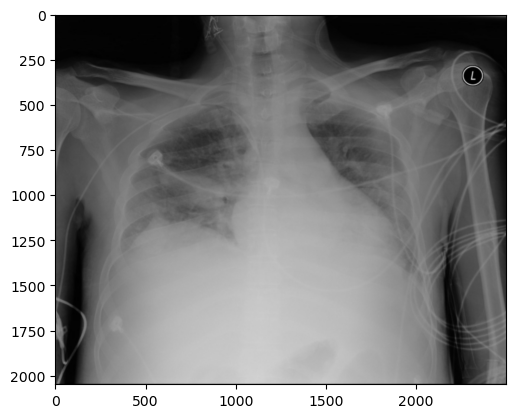

In [25]:
final = cv2.GaussianBlur(chosen_image,(5,5),cv2.BORDER_DEFAULT) 

plt.imshow(final)

#### How can deep learning help to detect presence of catheters and lines in images and which model you prefer?

CNN architectures can be used to detect the presence of catheters and lines in medical images such as cardiac images. Advanced algorithms like ResNet, EfficientNet can be utilized for this purpose. The CNN takes the image as input and learns hierarchical features through convolutions and pooling operations. The feature maps are then flattened and reduced into a vector through fully connected layers. The output vector can be in the form of probabilities for a set of classes, coordinates of a bounding box, predicted label for the center pixel, or a real value for regression tasks. Patch-based segmentation is another method based on a CNN classifier where the CNN takes a patch as input and outputs probabilities for different classes. By repeatedly forwarding patches located at different locations into the CNN for classification, one can finally get a pixel-wise segmentation map for the whole image.

-------------------------------------------------------------------------------------------------------
LeNet: LeNet was one of the first CNN architectures, and was primarily used for character recognition. It consisted of two convolutional layers followed by two fully connected layers. LeNet demonstrated the potential of CNNs in image recognition.

AlexNet: It introduced the use of ReLU activation function, dropout, and data augmentation techniques such as image flipping and random cropping. AlexNet significantly improved the accuracy of image classification compared to previous methods.

VGGNet: VGGNet is a CNN architecture that consists of multiple layers of small-size filters (3x3). It has many layers (16-19) and uses max-pooling to reduce the spatial dimensions of feature maps. VGGNet has achieved state-of-the-art results on many visual recognition tasks.

InceptionNet: InceptionNet is a CNN architecture that introduced the idea of multi-scale feature extraction by using filters of various sizes in parallel. This architecture is known for its efficiency in computation and achieved high accuracy on the ILSVRC challenge.

ResNet: ResNet is a CNN architecture that introduced the idea of skip connections to address the vanishing gradient problem. Skip connections allow the gradients to flow directly to earlier layers, allowing the model to learn deeper features. ResNet achieved state-of-the-art results on various image recognition tasks.

DenseNet: DenseNet is a CNN architecture that introduces the idea of densely connected layers, where each layer is connected to every other layer in a feed-forward fashion. This architecture reduces the number of parameters and improves the flow of gradients, allowing the model to learn more efficiently.

InceptionV3: This architecture was designed to address the problem of vanishing gradients in deep neural networks. It achieves this by using a combination of convolutional layers with different kernel sizes, and parallel branches with different dilations. InceptionV3 is often used for image classification and object recognition tasks.

VGG16: This architecture has a very deep network with 16 layers and is known for its simplicity and effectiveness. It consists of a series of convolutional and pooling layers, followed by fully connected layers. VGG16 is often used for image classification and object recognition tasks.

MobileNet: This architecture was designed for mobile devices and has a smaller memory footprint and faster processing time compared to other CNN architectures. It achieves this by using depthwise separable convolutions, which reduce the number of parameters while maintaining accuracy. MobileNet is often used for image classification, object detection, and face recognition tasks on mobile devices.

ResNeXt: This architecture builds on the ResNet architecture and uses a combination of grouped convolutions and bottleneck layers to achieve high accuracy while reducing the number of parameters. ResNeXt is often used for image classification and object recognition tasks.

DenseNet: This architecture connects each layer to every other layer in a feed-forward fashion, resulting in a very dense network. It achieves high accuracy while reducing the number of parameters by using feature concatenation instead of addition or averaging. DenseNet is often used for image classification, object detection, and segmentation tasks.